nodes visited   105
cache space     30000034
nodes stored    73
nodes forgotten 0
current depth   0
current node    
role: max
  root: work:        45 pn0:    INF pn1:      0 dn0:      0 dn1:    INF 

role: min
(8, 5): work:        10 pn0:    INF pn1:    INF dn0:      0 dn1:      0 
(1, 3): work:         1 pn0:    INF pn1:    INF dn0:      0 dn1:      0 
(6, 7): work:         4 pn0:    INF pn1:      1 dn0:      0 dn1:      4 
(5, 5): work:         1 pn0:    INF pn1:      1 dn0:      0 dn1:      3 
(5, 2): work: ????      pn0: ????   pn1: ????   dn0: ????   dn1: ????   
(4, 4): work:         5 pn0:    INF pn1:      4 dn0:      0 dn1:      1 
(7, 7): work:         7 pn0:    INF pn1:    INF dn0:      0 dn1:      0 
(1, 4): work:         5 pn0:    INF pn1:      3 dn0:      0 dn1:      1 
(7, 4): work:         5 pn0:    INF pn1:      4 dn0:      0 dn1:      1 
(2, 3): work:         1 pn0:    INF pn1:    INF dn0:      0 dn1:      0 
(3, 4): work:         3 pn0:    INF pn1:      0 dn0:      0

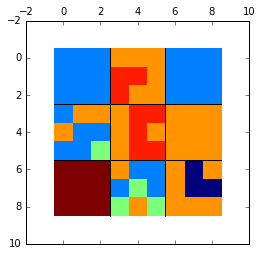

In [2]:
import sys
sys.path.append('../')

import tictactics_cython as tact
from tictactics_cython import Board
import dfpn_multi as dfpn
import matplotlib
import numpy as np
import cProfile
from matplotlib import pyplot as plt
import time
%matplotlib inline

board = np.zeros((9,9))
for x in [(0,7),(3,6),(7,1),(8,7)]:
    board[x]=1
for o in [(0,0),(0,1),(4,7),(8,1)]:
    board[o]=-1
big_board = np.array([[0,0,0],
                      [0,0,0],
                      [0,0,0]])

player = 1
game = Board(board=board,big_board = big_board,player = player)
for move in [(0,6),(1,0),(3,1),(2,4),(6,3),(1,1),(4,3),(3,0),(2,1),(6,4),(0,4),(1,5),(4,6),(5,1),(8,4),
             (7,3),(4,0),(5,0),(6,0),(0,2),(1,6),(4,2),(5,7),(6,5),(1,8),(4,8),(5,6),(7,0),(3,2),(0,8),
             (2,7),(7,5),(3,8),(2,6),(7,2),(3,7),(0,5),(1,7),(4,5),(5,8),(6,8),(2,8),(6,6),(2,0),(8,0),
             (8,2),(7,6),(4,1),(3,3),(2,2),(8,6),(6,2),(0,3),(1,2),(5,3),(6,1),(2,5),(8,8)]:
    game.update_move(move)
log_len = len(game.log)
dfpn.init()

tact.fancy_board(game)
t0 = time.clock()

sols = {}
with open('thankful.txt','a') as file_:
    file_.write('\n' + '*'*30 + '\nStarting a new run\n' + '*'*30 + '\n'*2)
for move in game.legal_moves():
    with open('thankful.txt','a') as file_:
        file_.write('*'*30 + '\nmove ' + str(move) + '\n' + '*'*30 + '\n')
# for move in [(3,1)]:
    game.update_move(move)
#     game.update_move((3,0))
    for move2 in game.legal_moves():
#     for move2 in [(0,5)]:
        dfpn.init()
        game.update_move(move2)
#         game.update_move((2,2))
        node,tree = dfpn.solve(game,3,{1:0,0:1,-1:2,2:1,-2:1},0,root = True,epsilon=1.02)
        if node[2] == 0:
            node_print = 'todd wins'
        elif node[5] == 0:
            node_print = "thankful wins"
        elif node[3]==node[4]==0:
            node_print = 'tie'
        sols[(move,move2)]=node_print
        with open('thankful.txt','a') as file_:
            file_.write('moves {}{} - {}\n'.format(move,move2,node_print))
        for _ in xrange(len(game.log) - log_len-1):
            game.erase_move()

    game.erase_move()
    assert(len(game.log) == log_len)
print 'time',time.clock() - t0

print sols
# print tree

In [4]:
with open('test.txt','a') as file_:
    file_.write('hi')